# 14

In [24]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
u0 = lambda x: exp(x)
ul = lambda t: exp(-8*t) + 0.5*t**2

dul = lambda t: -8*exp(-8*t) + t
d2ul = lambda t: 64*exp(-8*t) + 1
d3ul = lambda t: -512*exp(-8*t)
a = lambda x: 8
dadx = lambda x: 0
dadt = 0

u_an = lambda x, t: t**2/2 + exp(x)*exp(-8*t)

In [26]:
t0, t1 = 0, 1
x0, x1 = 0, 1
# N = 1000   # по времени
L = 21  # по пространству
CFL = 0.375  # -0.25

xx = np.linspace(x0, x1, L + 1)
h = np.diff(xx)[0]
tau = CFL * h
N = int((t1 - t0) / tau)
tt = np.linspace(t0, t1, N+1)
tau = np.diff(tt)[0]

In [27]:
u = np.zeros([N+1, L + 1])
# u[:, 0] = [ul(t) for t in tt]
u[0, :] = [u0(x) for x in xx]

In [28]:
for n in range(N):
    for l in range(L+1):
        if l>=3:
            a1 = 4*tau/(3*h)*(2*u[n][l-3] - 9*u[n][l-2] + 18*u[n][l-1]-11*u[n][l])
            a2 = 32*tau**2/h**2*(-u[n][l-3] + 4*u[n][l-2] -5*u[n][l-1] + 2*u[n][l])
            a3 = -256*tau**3/(3*h**3)*(-u[n][l-3] + 3*u[n][l-2] - 3*u[n][l-1] + u[n][l]) + tau*tt[n] + 0.5*tau**2
            u[n+1][l] = u[n][l] + a1 + a2 + a3
        elif l == 0:
            u[n+1][l] = ul(tt[n+1])
        elif l == 2:   
            t = tt[n+1]
            u0l = 1/8*(-dul(t) + t)
            u0ll = 1/64*(d2ul(t) - 1)
            u0lll= -1/8**3 * d3ul(t)
            u[n+1][l] = ul(t) + u0l*2*h + u0ll*2*h*h + u0lll*4/3*h**3
        elif l == 1:
            t = tt[n+1]
            u0l = 1/a(0)*(-dul(t) + t)
            u0ll = 1/64*(d2ul(t) - 1)
            u0lll= -1/8**3 * d3ul(t)
            u[n+1][l] = ul(t) + u0l*h + u0ll*h*h/2 + u0lll*h**3 / 6

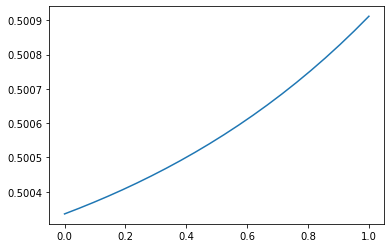

In [29]:
plt.plot(xx, u[-1])

In [30]:
n = L//10
u_ann = [u_an(x, tt[-1]) for x in xx[::n]]
diff = abs(u[-1][::n] - u_ann)

df = pd.DataFrame({'x': xx[::n], 'u': u[-1][::n], 'u*': u_ann, 'd': diff})
df

,x,u,u*,d
0,0.000000,0.500335,0.500335,0.000000e+00
1,0.095238,0.500369,0.500369,1.172197e-09
2,0.190476,0.500406,0.500406,8.370460e-11
3,0.285714,0.500446,0.500446,3.330669e-16
4,0.380952,0.500491,0.500491,1.559858e-09
5,0.476190,0.500540,0.500540,1.113868e-10
6,0.571429,0.500594,0.500594,8.881784e-16
7,0.666667,0.500653,0.500653,2.075720e-09
8,0.761905,0.500719,0.500719,1.482228e-10
9,0.857143,0.500790,0.500790,2.442491e-15


In [31]:
u_an(0.5, 1)

0.5005530843701478

In [32]:
max(diff)

2.762190809413312e-09

In [33]:
8.90287843446913e-13 / 5.762057497804562e-14

15.45086705202312

In [34]:
14.7 15.35 15.45

SyntaxError: invalid syntax (1868760064.py, line 1)

In [ ]:
4.0653150068514776e-08/2.762190809413312e-09

14.717719691909874